In [ ]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = model.train()
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )

Detected remote with confidence 0.998 at location [41.45, 71.01, 175.35, 116.22]
Detected remote with confidence 0.997 at location [335.66, 72.98, 366.33, 189.16]
Detected couch with confidence 0.986 at location [-0.05, 1.35, 639.69, 473.96]
Detected cat with confidence 0.998 at location [12.89, 51.6, 314.47, 467.71]
Detected cat with confidence 0.996 at location [347.26, 24.41, 640.46, 373.78]
odict_keys(['logits', 'pred_boxes', 'last_hidden_state', 'encoder_last_hidden_state'])


In [ ]:
import torch
targets = [{'boxes': torch.tensor([[ 15.0000,   0.0000,  69.3090,  27.1580],
        [ 35.0000,  30.0000, 121.7980, 152.2470],
        [124.0000,  16.0000, 225.3450, 138.6950],
        [173.0000, 196.0000, 245.1640, 287.8250],
        [ 80.0000, 188.0000, 151.2810, 289.8420],
        [155.0000, 317.0000, 248.1020, 453.8090],
        [120.0000, 613.0000, 283.3160, 638.7030],
        [  0.0000, 326.0000,  64.0080, 459.6530],
        [365.0000,  50.0000, 411.0660, 103.3460],
        [266.0000, 140.0000, 496.8530, 306.8270],
        [331.0000, 342.0000, 419.2530, 502.5230],
        [423.0000, 351.0000, 515.1840, 499.6600]]), 'labels': torch.tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])}, {'boxes': torch.tensor([[ 26.0000,  19.0000, 241.0190, 106.5670],
        [318.0000,  20.0000, 410.8590,  68.2530],
        [425.0000,   0.0000, 532.4550,  30.3950],
        [288.0000, 148.0000, 354.8580, 189.3180],
        [ 14.0000, 157.0000, 222.8290, 249.4570],
        [  0.0000, 306.0000, 192.5470, 391.4400],
        [408.0000,  95.0000, 614.1110, 247.1030],
        [285.0000, 189.0000, 355.5120, 283.1260],
        [407.0000, 255.0000, 502.3110, 316.2570],
        [598.0000, 411.0000, 639.6420, 493.6820],
        [447.0000, 569.0000, 640.1770, 639.7750],
        [100.0000, 528.0000, 293.0170, 638.0120]]), 'labels': torch.tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])}, {'boxes': torch.tensor([[  0.0000, 240.0000,  47.6600, 352.3400],
        [  5.0000, 372.0000, 365.1700, 600.0850],
        [263.0000, 231.0000, 442.7450, 392.3620],
        [481.0000, 206.0000, 640.3190, 423.1910],
        [448.0000, 452.0000, 625.0210, 605.1910],
        [419.0000,  41.0000, 472.1060,  69.5960],
        [351.0000,   0.0000, 408.1910,  51.7450],
        [161.0000,   0.0000, 339.3830,  52.4260]]), 'labels': torch.tensor([1, 1, 1, 1, 1, 1, 1, 1])}, {'boxes': torch.tensor([[ 96.0000, 156.0000, 322.9560, 266.0410],
        [318.0000, 177.0000, 466.4960, 293.0810],
        [217.0000, 204.0000, 530.3310, 514.0340],
        [633.0000, 205.0000, 639.9160, 264.3920],
        [620.0000, 306.0000, 639.4270, 379.2770],
        [609.0000, 384.0000, 636.3620, 470.9820],
        [223.0000, 471.0000, 332.1750, 504.3860],
        [210.0000, 576.0000, 316.4390, 610.1110]]), 'labels': torch.tensor([1, 1, 1, 1, 1, 1, 1, 1])}]

preds = 

In [1]:
import torch
import requests

from PIL import Image
from transformers import RTDetrForObjectDetection, RTDetrImageProcessor

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

image_processor = RTDetrImageProcessor.from_pretrained("jadechoghari/RT-DETRv2")
model = RTDetrForObjectDetection.from_pretrained("jadechoghari/RT-DETRv2")

inputs = image_processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

results = image_processor.post_process_object_detection(outputs, target_sizes=torch.tensor([image.size[::-1]]), threshold=0.3)

for result in results:
    for score, label_id, box in zip(result["scores"], result["labels"], result["boxes"]):
        score, label = score.item(), label_id.item()
        box = [round(i, 2) for i in box.tolist()]
        print(f"{model.config.id2label[label]}: {score:.2f} {box}")


/files/private_data/modeling_detr/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cat: 0.97 [341.14, 25.11, 639.98, 372.89]
cat: 0.96 [12.78, 56.35, 317.67, 471.34]
remote: 0.95 [39.96, 73.12, 175.65, 117.44]
sofa: 0.86 [-0.11, 2.97, 639.89, 473.62]
sofa: 0.82 [-0.12, 1.78, 639.87, 473.52]
remote: 0.79 [333.65, 76.38, 370.69, 187.48]
person: 0.35 [-0.11, 2.97, 639.89, 473.62]
bed: 0.32 [-0.12, 1.78, 639.87, 473.52]


In [5]:
from typing import Dict, Any
import os
import numpy as np
import torch
from torchvision.datasets import CocoDetection
from torchvision import transforms
from transformers import DetrImageProcessor
import torch.nn.functional as F

def pad_to_size(image_tensor, target_size=(1280, 1280)):
    """
    Добавляет паддинг к изображению до target_size (H, W)
    Args:
        image_tensor: torch.Tensor [B, C, H, W] или [C, H, W]
        target_size: кортеж (height, width)
    Returns:
        Padded tensor [B, C, target_height, target_width]
    """
    if len(image_tensor.shape) == 3:
        image_tensor = image_tensor.unsqueeze(0)
    
    _, _, h, w = image_tensor.shape
    target_h, target_w = target_size
    
    pad_h = max(target_h - h, 0)
    pad_w = max(target_w - w, 0)
    
    padding = (0, pad_w, 0, pad_h)
    
    return F.pad(image_tensor, padding, mode='constant', value=0)


class CocoDetectionTransforms(CocoDetection):
    def __init__(
        self,
        set_name: str,
        processor: DetrImageProcessor,
    ):
        self.set_name = set_name
        root = os.path.join('../../modeling-yolov8/crop_dataset_' + self.set_name, 'images')
        annotation_file = os.path.join(root, "_annotations.coco.json")
        self.processor = processor
        super().__init__(root=root, annFile=annotation_file)

    def __getitem__(self, idx: int) -> Dict[str, Any]:
        img, target = super().__getitem__(idx)

        # Получаем оригинальные размеры изображения
        original_width, original_height = img.size
        
        # Преобразуем изображение в тензор и добавляем паддинг
        img_tensor = torch.tensor(np.array(img)).permute(2, 0, 1).float()  # C, H, W
        padded_img = pad_to_size(
            img_tensor,
            target_size=(
                1280,
                1280,
            ),
        )
        
        # Преобразуем обратно в PIL Image для обработки процессором
        padded_img_pil = transforms.ToPILImage()(padded_img.squeeze(0))
        
        # Корректируем bounding boxes для паддинга
        for item in target:
            item['category_id'] -= 1
            
            # Получаем bbox в формате [x_min, y_min, width, height]
            bbox = item['bbox']
            cx, cy, width, height = bbox
            
            cx *= original_width
            cy *= original_height
            width *= original_width
            height *= original_height

            cx /= 1280
            cy /= 1280
            width /= 1280
            height /= 1280
            
            # Обновляем bbox в аннотации
            item['bbox'] = [cx, cy, width, height]

        image_id = self.ids[idx]
        selected_target = {'image_id': image_id, 'annotations': target}
        encoding = self.processor(
            images=padded_img_pil,
            annotations=selected_target,
            return_tensors="pt"
        )
        pixel_values = encoding["pixel_values"].squeeze()
        target_return = encoding["labels"][0] if len(encoding["labels"]) > 0 else torch.tensor([])
        return pixel_values, target_return

processor = DetrImageProcessor.from_pretrained(
        'facebook/detr-resnet-50',
        size={
            'max_height': 1280,
            'max_width': 1280,
        },
    )

In [6]:
train_dataset = CocoDetectionTransforms('train',processor)

loading annotations into memory...
Done (t=0.16s)
creating index...
index created!


In [7]:
train_dataset[0]

(tensor([[[ 1.1700,  1.1529,  1.1529,  ...,  1.1187,  1.1187,  1.1015],
          [ 1.1529,  1.1529,  1.1529,  ...,  1.1187,  1.1187,  1.1187],
          [ 1.1358,  1.1358,  1.1358,  ...,  1.1187,  1.1187,  1.1187],
          ...,
          [ 0.2282, -0.0116, -0.2171,  ..., -0.2684, -0.3198, -0.3712],
          [ 0.5536,  0.3823,  0.1597,  ..., -0.2684, -0.3027, -0.3027],
          [ 0.8618,  0.7077,  0.5193,  ..., -0.3027, -0.2684, -0.2342]],
 
         [[ 0.5203,  0.5028,  0.5028,  ...,  0.5378,  0.5378,  0.5203],
          [ 0.5028,  0.5028,  0.5028,  ...,  0.5378,  0.5378,  0.5378],
          [ 0.4853,  0.4853,  0.4853,  ...,  0.5378,  0.5378,  0.5378],
          ...,
          [ 0.3627,  0.1176, -0.0399,  ...,  0.0301, -0.0224, -0.0749],
          [ 0.6954,  0.5203,  0.3452,  ...,  0.0301, -0.0049, -0.0049],
          [ 1.0105,  0.8529,  0.7129,  ..., -0.0049,  0.0301,  0.0651]],
 
         [[-0.3404, -0.3578, -0.3578,  ..., -0.2881, -0.2881, -0.3055],
          [-0.3578, -0.3578,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


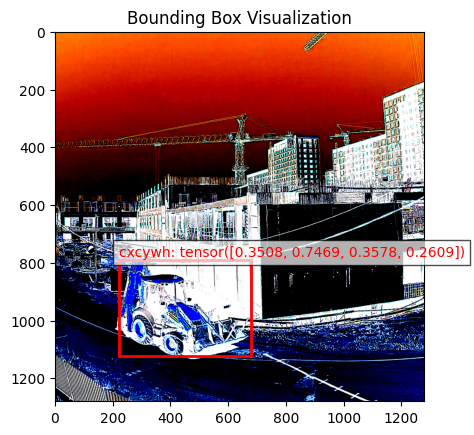

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

img_width, img_height = 1280, 1280

# Преобразование из cxcywh в xywh
def cxcywh_to_xywh(box_cxcywh, img_width, img_height):
    cx, cy, w, h = box_cxcywh
    # Конвертируем из относительных координат в абсолютные (пиксели)
    cx_abs = cx * img_width
    cy_abs = cy * img_height
    w_abs = w * img_width
    h_abs = h * img_height
    # Конвертируем в xywh
    x = cx_abs - w_abs / 2
    y = cy_abs - h_abs / 2
    return [x, y, w_abs, h_abs]

box_xywh = cxcywh_to_xywh(train_dataset[0][1]['boxes'][0], img_width, img_height)

# Создание фигуры и осей
fig, ax = plt.subplots(1)
ax.imshow(train_dataset[0][0].permute(1,2,0))

# Создание прямоугольника (bounding box)
rect = patches.Rectangle(
    (box_xywh[0], box_xywh[1]),  # (x,y)
    box_xywh[2],                  # width
    box_xywh[3],                  # height
    linewidth=2,
    edgecolor='r',
    facecolor='none'
)

# Добавление прямоугольника на изображение
ax.add_patch(rect)

# Добавление текста с координатами
plt.text(
    box_xywh[0], box_xywh[1] - 10,
    f"cxcywh: {train_dataset[0][1]['boxes'][0]}",
    color='red',
    fontsize=10,
    bbox=dict(facecolor='white', alpha=0.7)
)

plt.title("Bounding Box Visualization")
plt.show()

In [4]:
results

[{'scores': tensor([0.9652, 0.9599, 0.9461, 0.8614, 0.8181, 0.7935, 0.3454, 0.3176]),
  'labels': tensor([15, 15, 65, 57, 57, 65,  0, 59]),
  'boxes': tensor([[ 3.4114e+02,  2.5111e+01,  6.3998e+02,  3.7289e+02],
          [ 1.2779e+01,  5.6347e+01,  3.1767e+02,  4.7134e+02],
          [ 3.9959e+01,  7.3117e+01,  1.7565e+02,  1.1744e+02],
          [-1.0506e-01,  2.9707e+00,  6.3989e+02,  4.7362e+02],
          [-1.2445e-01,  1.7774e+00,  6.3987e+02,  4.7352e+02],
          [ 3.3365e+02,  7.6385e+01,  3.7069e+02,  1.8748e+02],
          [-1.0506e-01,  2.9707e+00,  6.3989e+02,  4.7362e+02],
          [-1.2445e-01,  1.7774e+00,  6.3987e+02,  4.7352e+02]])}]

In [2]:
inputs

{'pixel_values': tensor([[[[0.5490, 0.5647, 0.5725,  ..., 0.3686, 0.4196, 0.4000],
          [0.5451, 0.5608, 0.5569,  ..., 0.3922, 0.4392, 0.3843],
          [0.5373, 0.5686, 0.5490,  ..., 0.4039, 0.4392, 0.3725],
          ...,
          [0.9137, 0.8863, 0.9294,  ..., 0.5294, 0.5176, 0.4353],
          [0.9137, 0.9176, 0.9333,  ..., 0.3882, 0.3608, 0.3255],
          [0.9333, 0.9647, 0.9333,  ..., 0.2902, 0.2902, 0.2863]],

         [[0.0980, 0.0980, 0.0941,  ..., 0.0627, 0.0510, 0.0392],
          [0.0902, 0.1020, 0.0863,  ..., 0.0510, 0.0627, 0.0471],
          [0.0863, 0.1137, 0.0824,  ..., 0.0392, 0.0706, 0.0471],
          ...,
          [0.3529, 0.3216, 0.3843,  ..., 0.1294, 0.1020, 0.0627],
          [0.3529, 0.3569, 0.3843,  ..., 0.0784, 0.0510, 0.0471],
          [0.3922, 0.4275, 0.3765,  ..., 0.0510, 0.0980, 0.0667]],

         [[0.2196, 0.2627, 0.2863,  ..., 0.1490, 0.1529, 0.1294],
          [0.2235, 0.2196, 0.2235,  ..., 0.1451, 0.1608, 0.1255],
          [0.2000, 0.2078